In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Masaüstü\MIS220\Code\.vscode\train.csv", header=None)

# Yeni Bölüm

In [23]:
df.head

<bound method NDFrame.head of            0       1       2       3     4   5     6       7    8    9    ...  \
0        69769    -946  0.1613  0.7960  Panl   N  Bus2  0.0742    0    2  ...   
1       236977     -92     NaN     NaN   NaN   Y  Othr     NaN    0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl   N  Bus3  0.0387    0    2  ...   
3        94708   -1651  0.0263     NaN  Blok   N  Bus3     NaN    0    2  ...   
4        84556    -977     NaN     NaN   NaN   N  Rest     NaN    0    2  ...   
...        ...     ...     ...     ...   ...  ..   ...     ...  ...  ...  ...   
246003  248161    -595     NaN     NaN   NaN   N  Bus3     NaN    0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl   N  Mede  0.1180    0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd   N  XNAA  0.2233    0    2  ...   
246006  148183  365243     NaN     NaN   NaN   N  XNAA     NaN    0    3  ...   
246007    5167  365243     NaN     NaN   NaN   Y  XNAA     NaN    0    2  ...  

In [24]:
df.shape

(246008, 122)

In [25]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]

In [26]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

# Yeni Bölüm

In [28]:
df.dtypes

C1        int64
C2        int64
C3      float64
C4      float64
C5       object
         ...   
C118     object
C119    float64
C120    float64
C121      int64
C122      int64
Length: 122, dtype: object

In [29]:
df.isnull().sum()
#hangi kolonda kaç tane null değer var buna baktık

C1           0
C2           0
C3      143829
C4      163543
C5      124975
         ...  
C118         0
C119       811
C120    122297
C121         0
C122         0
Length: 122, dtype: int64

In [30]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df= df.drop(NaColumn, axis=1)
#Eğer bir kolondaki değerlerin %10'tan fazlası null ise o kolonları datasetten çıkardık

In [31]:
df.shape

(246008, 65)

In [32]:
dtypes = df.dtypes

continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("C122")
label.append("C122")

In [33]:
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    unique_values = df[col].value_counts()
    print(f"{col}---{len(unique_values)}")

###hangi object tipindedeki sütunda kaç tane kategori var buna baktık

C6---2
C7---51
C17---7
C31---8
C32---6
C48---2
C68---5
C70---3
C94---7
C104---2
C118---6


In [34]:
for column in df.columns:

    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df[column] = df[column].replace(binary)
  
###2 kategori içeren object tipindeki sütunlardaki kategorileri binary hale getirdik for döngüsü yardımıyla aşağıda da A1 ve A6 sütununu çalıştırarak kontrol ettik 
### 236977 ID'li kişinin A6 sütununda karşısında Y yazıyordu ve bunu 1'e çevirmiş yani for döngümüz çalışmış  
print(df[['C1', 'C6']].head())

       C1  C6
0   69769   0
1  236977   1
2  168821   0
3   94708   0
4   84556   0


In [35]:
column_cat = df.select_dtypes(include='object').columns
print(column_cat)
#bu işlemlerin ardından 8 kategorik datamız kaldı bunları elemeden önce satır bazında eğer kalan kolonlardan yarısı boş olan bir datamız varsa bu datayı setten çıkartalım

Index(['C7', 'C17', 'C31', 'C32', 'C68', 'C70', 'C94', 'C118'], dtype='object')


In [36]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
remove_cols = []

for col in categorical:
    df[col] = le.fit_transform(df[col])

for col in categorical:
    if len(df[col].unique()) == 2:
        remove_cols.append(col)

# Convert binary to a list
binary = []

for col in remove_cols:
    categorical.remove(col)
    binary.append(col)


In [40]:
df[continuous] = df.groupby("C122")[continuous].apply(lambda x: x.fillna(x.median()))

#sayısal değer olup NA değer içeren sütunlardaki NA'ler yerine o sütunun medianı ile doldurduk

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_49836\162394906.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[continuous] = df.groupby("C122")[continuous].apply(lambda x: x.fillna(x.median()))


In [41]:
df[categorical] = df.groupby("C122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))

#### kategorik data içeren ve NA olan sütunlardaki NA'leri o sütunun mode'u ile doldurduk

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_49836\3300284628.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[categorical] = df.groupby("C122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [42]:
df.isnull().sum()

C1      0
C2      0
C6      0
C7      0
C9      0
       ..
C117    0
C118    0
C119    0
C121    0
C122    0
Length: 65, dtype: int64

In [43]:
df["C122"].value_counts()
df["C122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

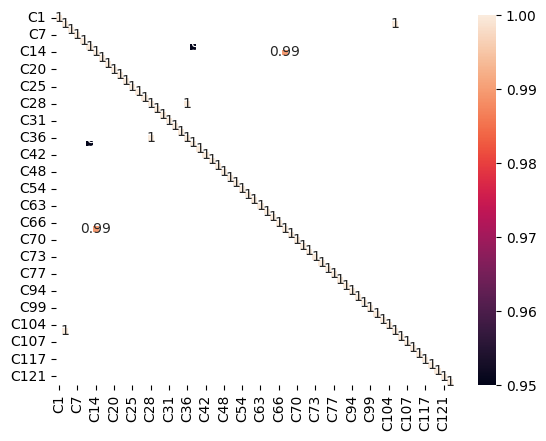

In [44]:
corr_matrix = df.corr().round(2)

# 0.9'dan fazla korelasyon içeren sütunları filtreledik
corr_filtered = corr_matrix[(corr_matrix > 0.90) | (corr_matrix < -0.90)]

sns.heatmap(corr_filtered, annot=True)
plt.show()

In [45]:
high_corr_pairs = []
threshold = 0.9
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((df.columns[i], df.columns[j]))
#korelasyonu 0.9'dan fazla olan kolonlar

In [46]:
high_corr_pairs
##### korelasyonu 0.9 dan fazla olan sütun ikilileri

[('C2', 'C105'), ('C10', 'C38'), ('C14', 'C67'), ('C28', 'C36')]

In [47]:
for pair in high_corr_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        if pair[0] in continuous:
            df = df.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            df = df.drop(pair[0], axis=1)
        else:
            vif_pair_0 = variance_inflation_factor(df.values, df.columns.get_loc(pair[0]))
            vif_pair_1 = variance_inflation_factor(df.values, df.columns.get_loc(pair[1]))
            if vif_pair_0 >= vif_pair_1:
                df = df.drop(pair[1], axis=1)
            else:
                df = df.drop(pair[0], axis=1)

++++++++++++++++++++++++++++++++++++++

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [52]:
df

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C104,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,69769,-946,0,4,0,2,180000.0,0,6,0,...,0,0,0,0,-4670,0,1,0.0,0,0
1,236977,-92,1,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
2,168821,-1646,0,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
3,94708,-1651,0,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
4,84556,-977,0,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,0,5,0,2,405000.0,0,6,0,...,1,0,0,0,-4420,0,1,0.0,0,0
246004,257069,-4334,0,27,0,2,225000.0,0,6,0,...,0,0,0,0,-2561,0,3,0.0,0,0
246005,154350,365243,0,50,0,2,234000.0,0,6,0,...,0,0,0,0,-4636,0,0,0.0,0,0
246006,148183,365243,0,50,0,3,810000.0,0,0,0,...,0,0,0,0,-4636,0,1,0.0,0,1


In [70]:
#desicion tree split
X = df[['C1', 'C2', 'C7', 'C9', 'C10', 'C14', 'C16', 'C17', 'C20']]
y = df['C6']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67     32525
           1       0.37      0.38      0.38     16677

    accuracy                           0.57     49202
   macro avg       0.53      0.53      0.53     49202
weighted avg       0.57      0.57      0.57     49202



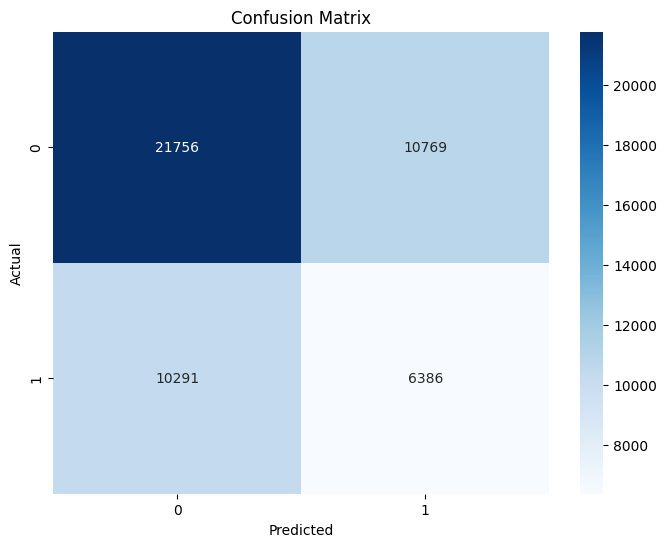

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67     32525
           1       0.37      0.38      0.38     16677

    accuracy                           0.57     49202
   macro avg       0.53      0.53      0.53     49202
weighted avg       0.57      0.57      0.57     49202



In [71]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create classification report
report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

In [74]:
X = df.drop("C6", axis=1)
y = df["C6"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     32525
           1       0.46      0.48      0.47     16677

    accuracy                           0.63     49202
   macro avg       0.59      0.60      0.59     49202
weighted avg       0.64      0.63      0.63     49202



In [75]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

KeyboardInterrupt: 

In [78]:
# Group the features based on the number of unique values
continuous_feats = []
categorical_feats = []
binary_feats = []
label = []

for col in df.columns:
    if df[col].nunique() == 2:
        binary_feats.append(col)
    elif df[col].nunique() > 30:
        continuous_feats.append(col)
    else:
        categorical_feats.append(col)

binary_feats.remove("C122")
label.append("C122")

In [79]:
from scipy.stats import shapiro

In [80]:
for col in continuous_feats:
    stat, p = shapiro(df[col])
    print(col, "Shapiro-Wilk test: Statistics=%.3f, p-value=%.3f" % (stat, p))
    if p > 0.05:
        print(col, "is normally distributed")
    else:
        print(col, "is not normally distributed")

c:\Users\LENOVO\Anaconda\envs\DataScience\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C1 Shapiro-Wilk test: Statistics=0.955, p-value=0.000
C1 is not normally distributed
C2 Shapiro-Wilk test: Statistics=0.480, p-value=0.000
C2 is not normally distributed
C7 Shapiro-Wilk test: Statistics=0.856, p-value=0.000
C7 is not normally distributed
C14 Shapiro-Wilk test: Statistics=0.889, p-value=0.000
C14 is not normally distributed
C26 Shapiro-Wilk test: Statistics=0.927, p-value=0.000
C26 is not normally distributed
C28 Shapiro-Wilk test: Statistics=0.612, p-value=0.000
C28 is not normally distributed
C41 Shapiro-Wilk test: Statistics=0.911, p-value=0.000
C41 is not normally distributed
C54 Shapiro-Wilk test: Statistics=0.877, p-value=0.000
C54 is not normally distributed
C58 Shapiro-Wilk test: Statistics=0.116, p-value=0.000
C58 is not normally distributed
C64 Shapiro-Wilk test: Statistics=0.954, p-value=0.000
C64 is not normally distributed
C71 Shapiro-Wilk test: Statistics=0.970, p-value=0.000
C71 is not normally distributed
C86 Shapiro-Wilk test: Statistics=0.922, p-value=

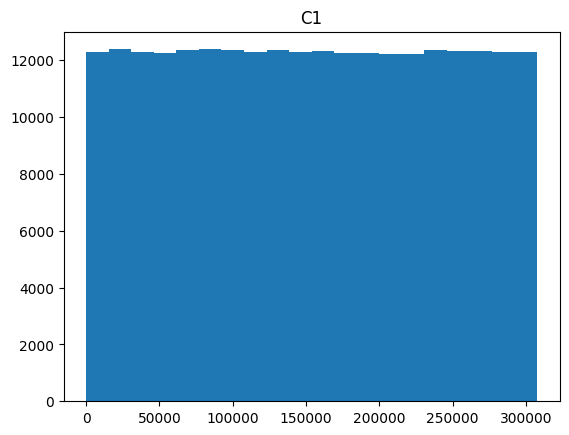

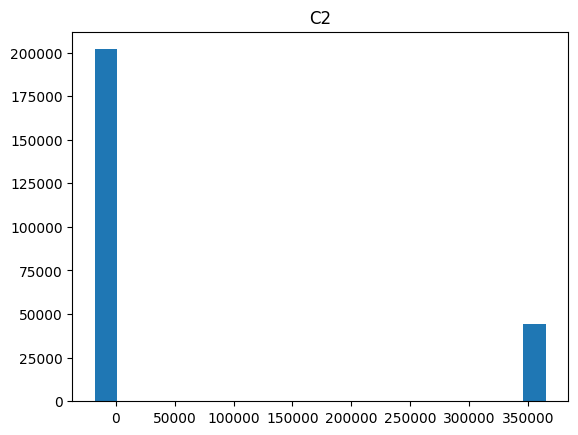

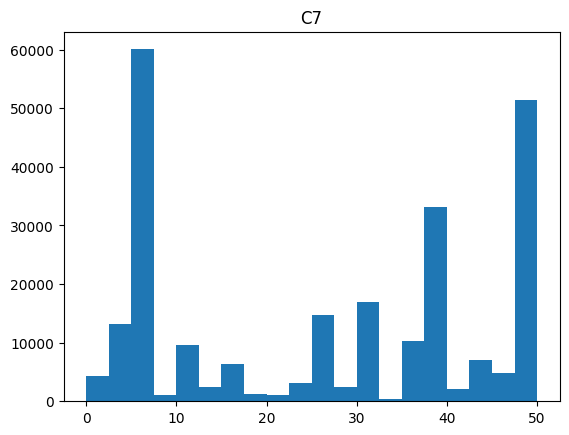

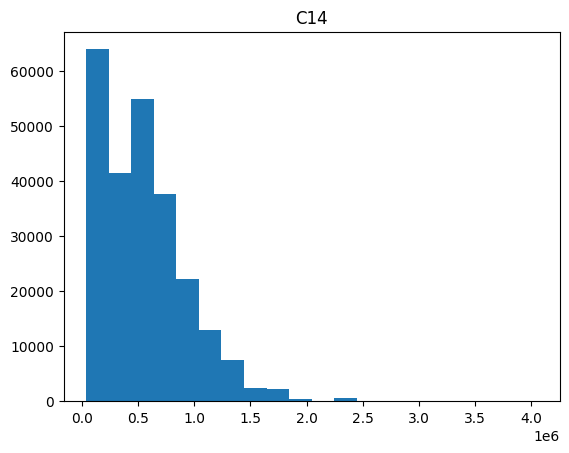

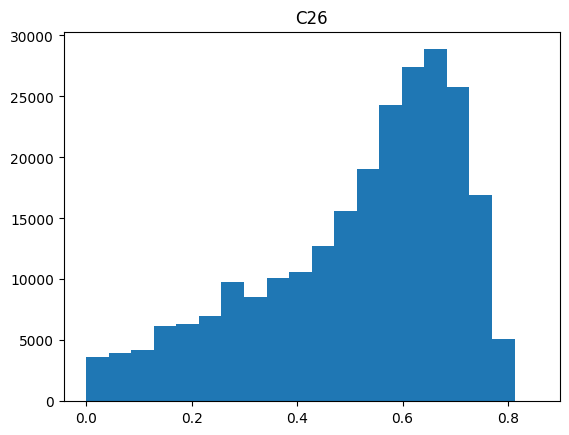

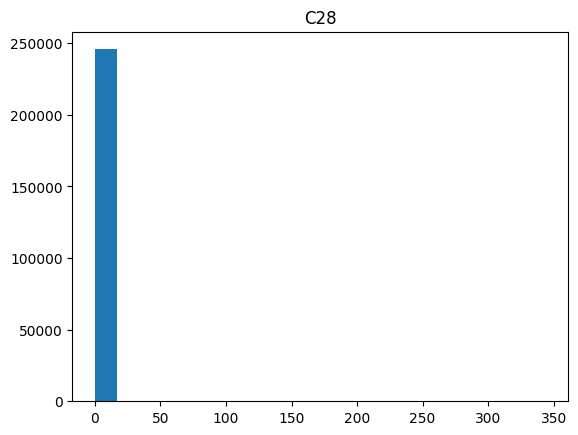

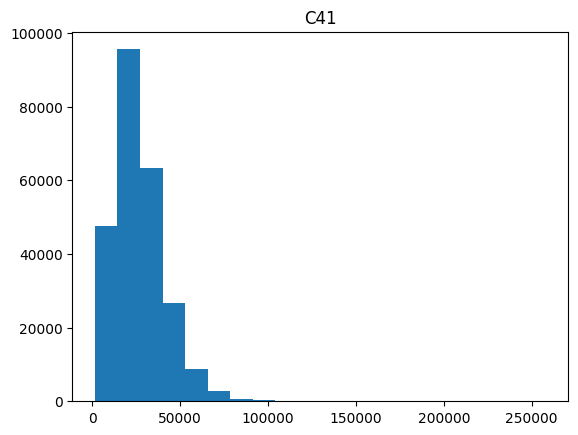

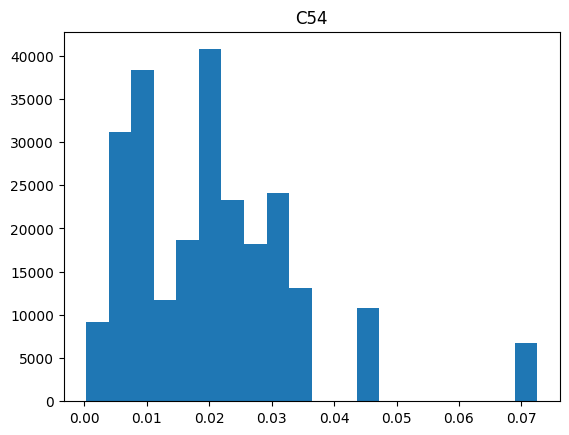

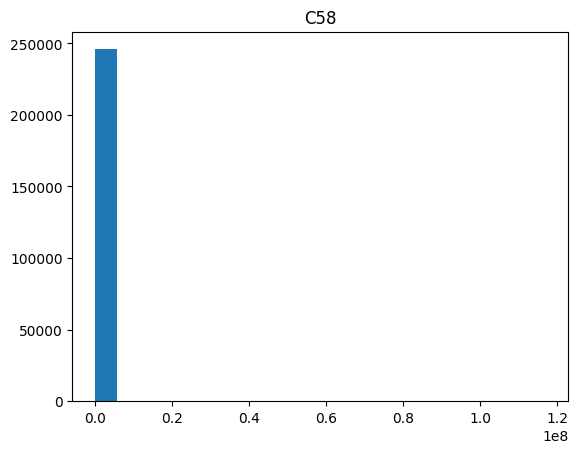

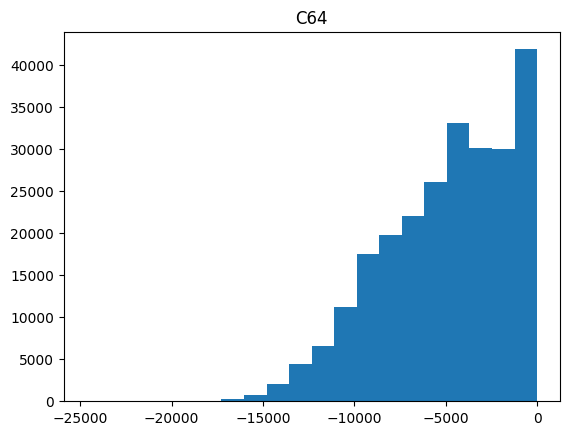

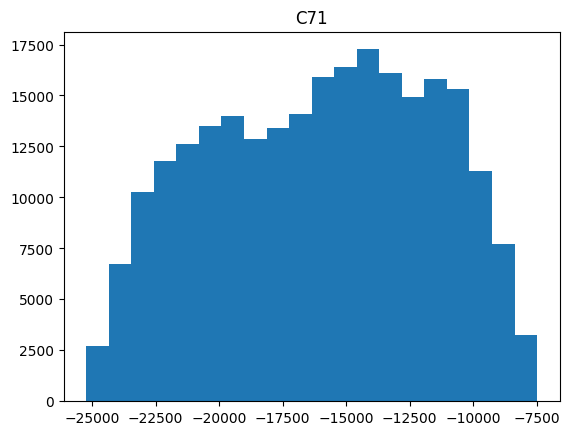

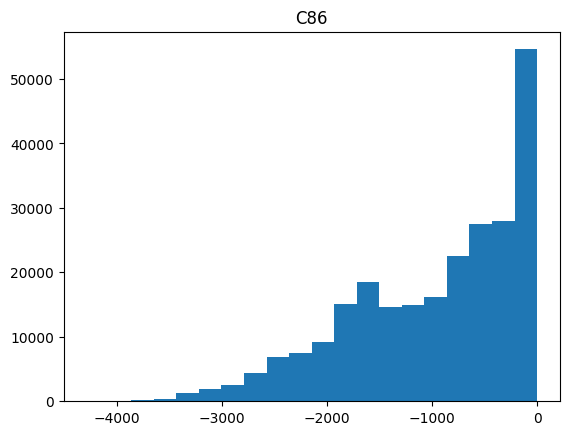

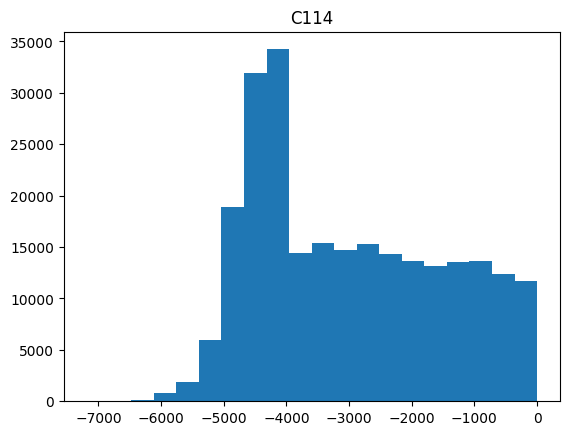

In [82]:
# Plot histograms for continuous features
for col in continuous_feats:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

In [83]:
df

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C104,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,69769,-946,0,4,0,2,180000.0,0,6,0,...,0,0,0,0,-4670,0,1,0.0,0,0
1,236977,-92,1,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
2,168821,-1646,0,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
3,94708,-1651,0,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
4,84556,-977,0,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,0,5,0,2,405000.0,0,6,0,...,1,0,0,0,-4420,0,1,0.0,0,0
246004,257069,-4334,0,27,0,2,225000.0,0,6,0,...,0,0,0,0,-2561,0,3,0.0,0,0
246005,154350,365243,0,50,0,2,234000.0,0,6,0,...,0,0,0,0,-4636,0,0,0.0,0,0
246006,148183,365243,0,50,0,3,810000.0,0,0,0,...,0,0,0,0,-4636,0,1,0.0,0,1


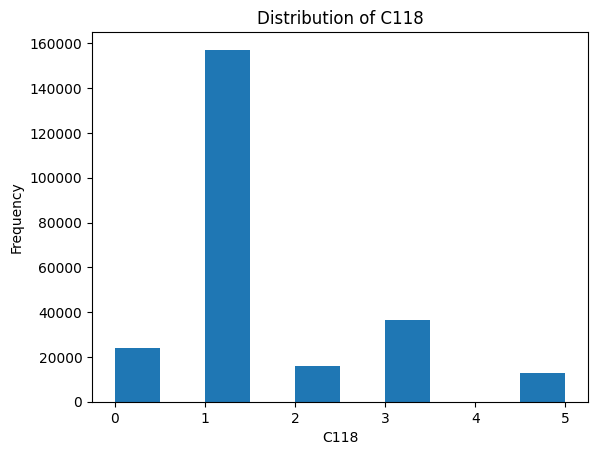

In [86]:
plt.hist(df['C118'], bins = 10)
plt.xlabel('C118')
plt.ylabel('Frequency')
plt.title('Distribution of C118')
plt.show()

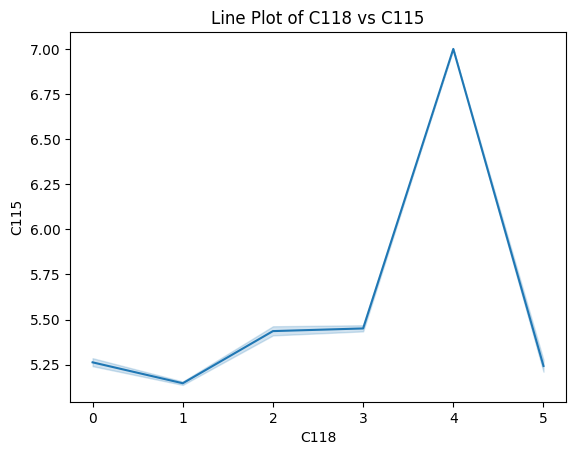

In [90]:
sns.lineplot(x ='C118', y='C17', data=df)
plt.xlabel('C118')
plt.ylabel('C17')
plt.title('Line Plot of C118 vs C115')
plt.show()